## Heart Disease
Data blev taget fra [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

Nødvendige pakker hentes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Main as dataloader

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108       15             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132       12             1   
914   68        144          193          1    141       34             1   
915   57        130          131          0    115       12             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex  ChestPainType  RestingECG  Exercise_Angina  ST_Slope  
0      1  

Data loades fra csv fil:

In [2]:
data = dataloader.load_data(False);

Vi har 918 observationer med 12 variabler. Her er summary af vores data.

In [3]:
print(data.head())
print(data.info())
print(data.describe())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  Sex  \
0   40        140          289          0    172        0             0    1   
1   49        160          180          0    156        1             1    0   
2   37        130          283          0     98        0             0    1   
3   48        138          214          0    108       15             1    0   
4   54        150          195          0    122        0             0    1   

   ChestPainType  RestingECG  Exercise_Angina  ST_Slope  
0              0           0                0         0  
1              1           0                0         1  
2              0           1                0         0  
3              2           0                1         1  
4              1           0                0         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           

#### Histogram


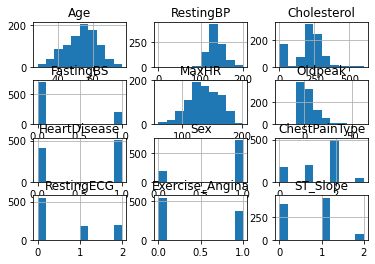

In [4]:
data.hist()
plt.show()